<a href="https://colab.research.google.com/github/Mahak-Yadav222/Cirrhosis_prediction_minor_project/blob/main/23214_Mahak_Yadav_MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!mv /content/kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d fedesoriano/cirrhosis-prediction-dataset

  0% 0.00/11.0k [00:00<?, ?B/s]
100% 11.0k/11.0k [00:00<00:00, 30.4MB/s]


In [ ]:
!unzip cirrhosis-prediction-dataset.zip

Archive:  cirrhosis-prediction-dataset.zip
  inflating: cirrhosis.csv           


In [ ]:
csv_file="cirrhosis.csv"
data = pd.read_csv(csv_file)
data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


DATA PREPROCESSING

In [ ]:
data.head(7)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0


In [ ]:
data.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
data.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [ ]:
data["Age"]=data["Age"]/365


##1.) Are there any missing values in the dataset? If so, how will you handle them? Are there any inconsistent or erroneous data entries that need to be addressed?


There are a large number of null values in most of the attributes, hence it's not practical to drop all of them.

In [ ]:
data[data['Stage'].isnull()]

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
312,313,4062,C,NaN,60.041096,F,NaN,NaN,NaN,N,0.7,NaN,3.65,NaN,NaN,NaN,NaN,378.0,11.0,NaN
316,317,3030,C,NaN,62.043836,F,NaN,NaN,NaN,N,0.8,NaN,2.48,NaN,NaN,NaN,NaN,273.0,10.0,NaN
318,319,41,D,NaN,46.032877,F,NaN,NaN,NaN,N,5.0,NaN,2.93,NaN,NaN,NaN,NaN,260.0,10.4,NaN
321,322,2011,D,NaN,64.043836,F,NaN,NaN,NaN,N,1.1,NaN,3.69,NaN,NaN,NaN,NaN,139.0,10.5,NaN
333,334,466,D,NaN,56.038356,F,NaN,NaN,NaN,N,7.1,NaN,3.51,NaN,NaN,NaN,NaN,721.0,11.8,NaN
336,337,2286,D,NaN,56.038356,F,NaN,NaN,NaN,N,1.8,NaN,3.64,NaN,NaN,NaN,NaN,141.0,10.0,NaN


In [ ]:
data.dropna(axis=0,subset=["Stage"],inplace=True) #Only 6 entries with NaN values under Stage attribute

In [ ]:
data['Stage'] = data['Stage'].astype(int)

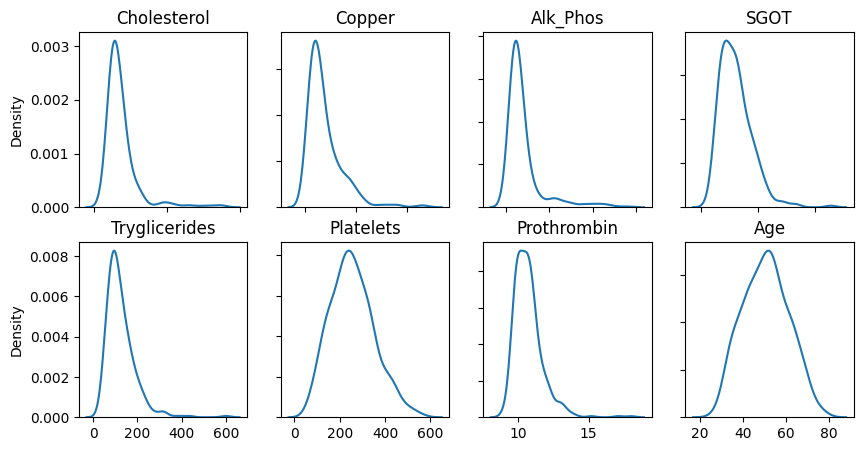

<Figure size 1200x800 with 0 Axes>

In [ ]:
missing_nums = [["Cholesterol","Copper","Alk_Phos","SGOT"],["Tryglicerides","Platelets","Prothrombin","Age"]]
fig, axs = plt.subplots(2, 4,figsize=(10,5))
plt.figure(figsize=(12,8))
for i in range(2):
  for j in range(4):
    sns.kdeplot(data,x=missing_nums[i][j], ax=axs[i,j])
    axs[i,j].label_outer()
    axs[i,j].set_xlabel('', fontsize=15)
    axs[i,j].set_title(missing_nums[i][j])
plt.show()

Analysing the data distribution, we can conclude that replacing null values with the median of the data in the above attributes is a reasonable approach.
The null values in attributes with categorical data like: Drug, Ascites etc. can be replaced by the mode value.

In [ ]:
missing_nums = ["Cholesterol","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin"]
for column in data.columns:
    for c in missing_nums:
      if column==c:
        median= data[column].median()
        data[column].fillna(median, inplace=True)


In [ ]:
categorical_columns = data.select_dtypes(include=('object')).columns

for c in categorical_columns:
    data[c].fillna(data[c].mode().values[0], inplace=True)

#DATA VISUALISATION

## 2.)How do the clinical features (age, gender, alcohol consumption, hepatitis B and C status, etc.) vary with respect to the presence or absence of cirrhosis? Create visualizations like bar plots or stacked plots to explore their relationships.


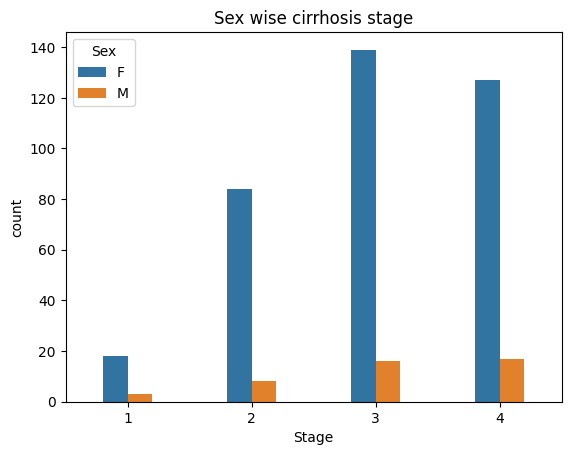

In [ ]:
sns.countplot(x='Stage', hue='Sex', data=data, width=0.4)
plt.title("Sex wise cirrhosis stage")
plt.show()



This shows that the "Female" gender is more susceptible to cirrosis at all the stages.

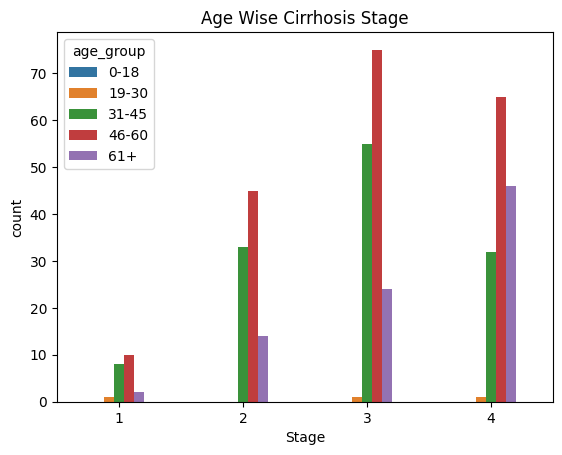

In [ ]:
age_grps = [0, 18, 30, 45, 60, float('inf')]
age_labels = ['0-18', '19-30', '31-45', '46-60', '61+']
data['age_group'] = pd.cut(data['Age'], bins=age_grps, labels=age_labels, right=False)
sns.countplot(x='Stage', hue='age_group', data=data, width=0.4)
plt.title("Age Wise Cirrhosis Stage")
plt.show()

The above distribution shows that individuals belonging to the 40-60 age group exhibit the highest susceptibility across all stages of cirrhosis. This observation suggests that individuals within this age range are more prone to being affected by the disease regardless of its stage.Meanwhile, the younger population of age 19-30 are relatively less prone to it.

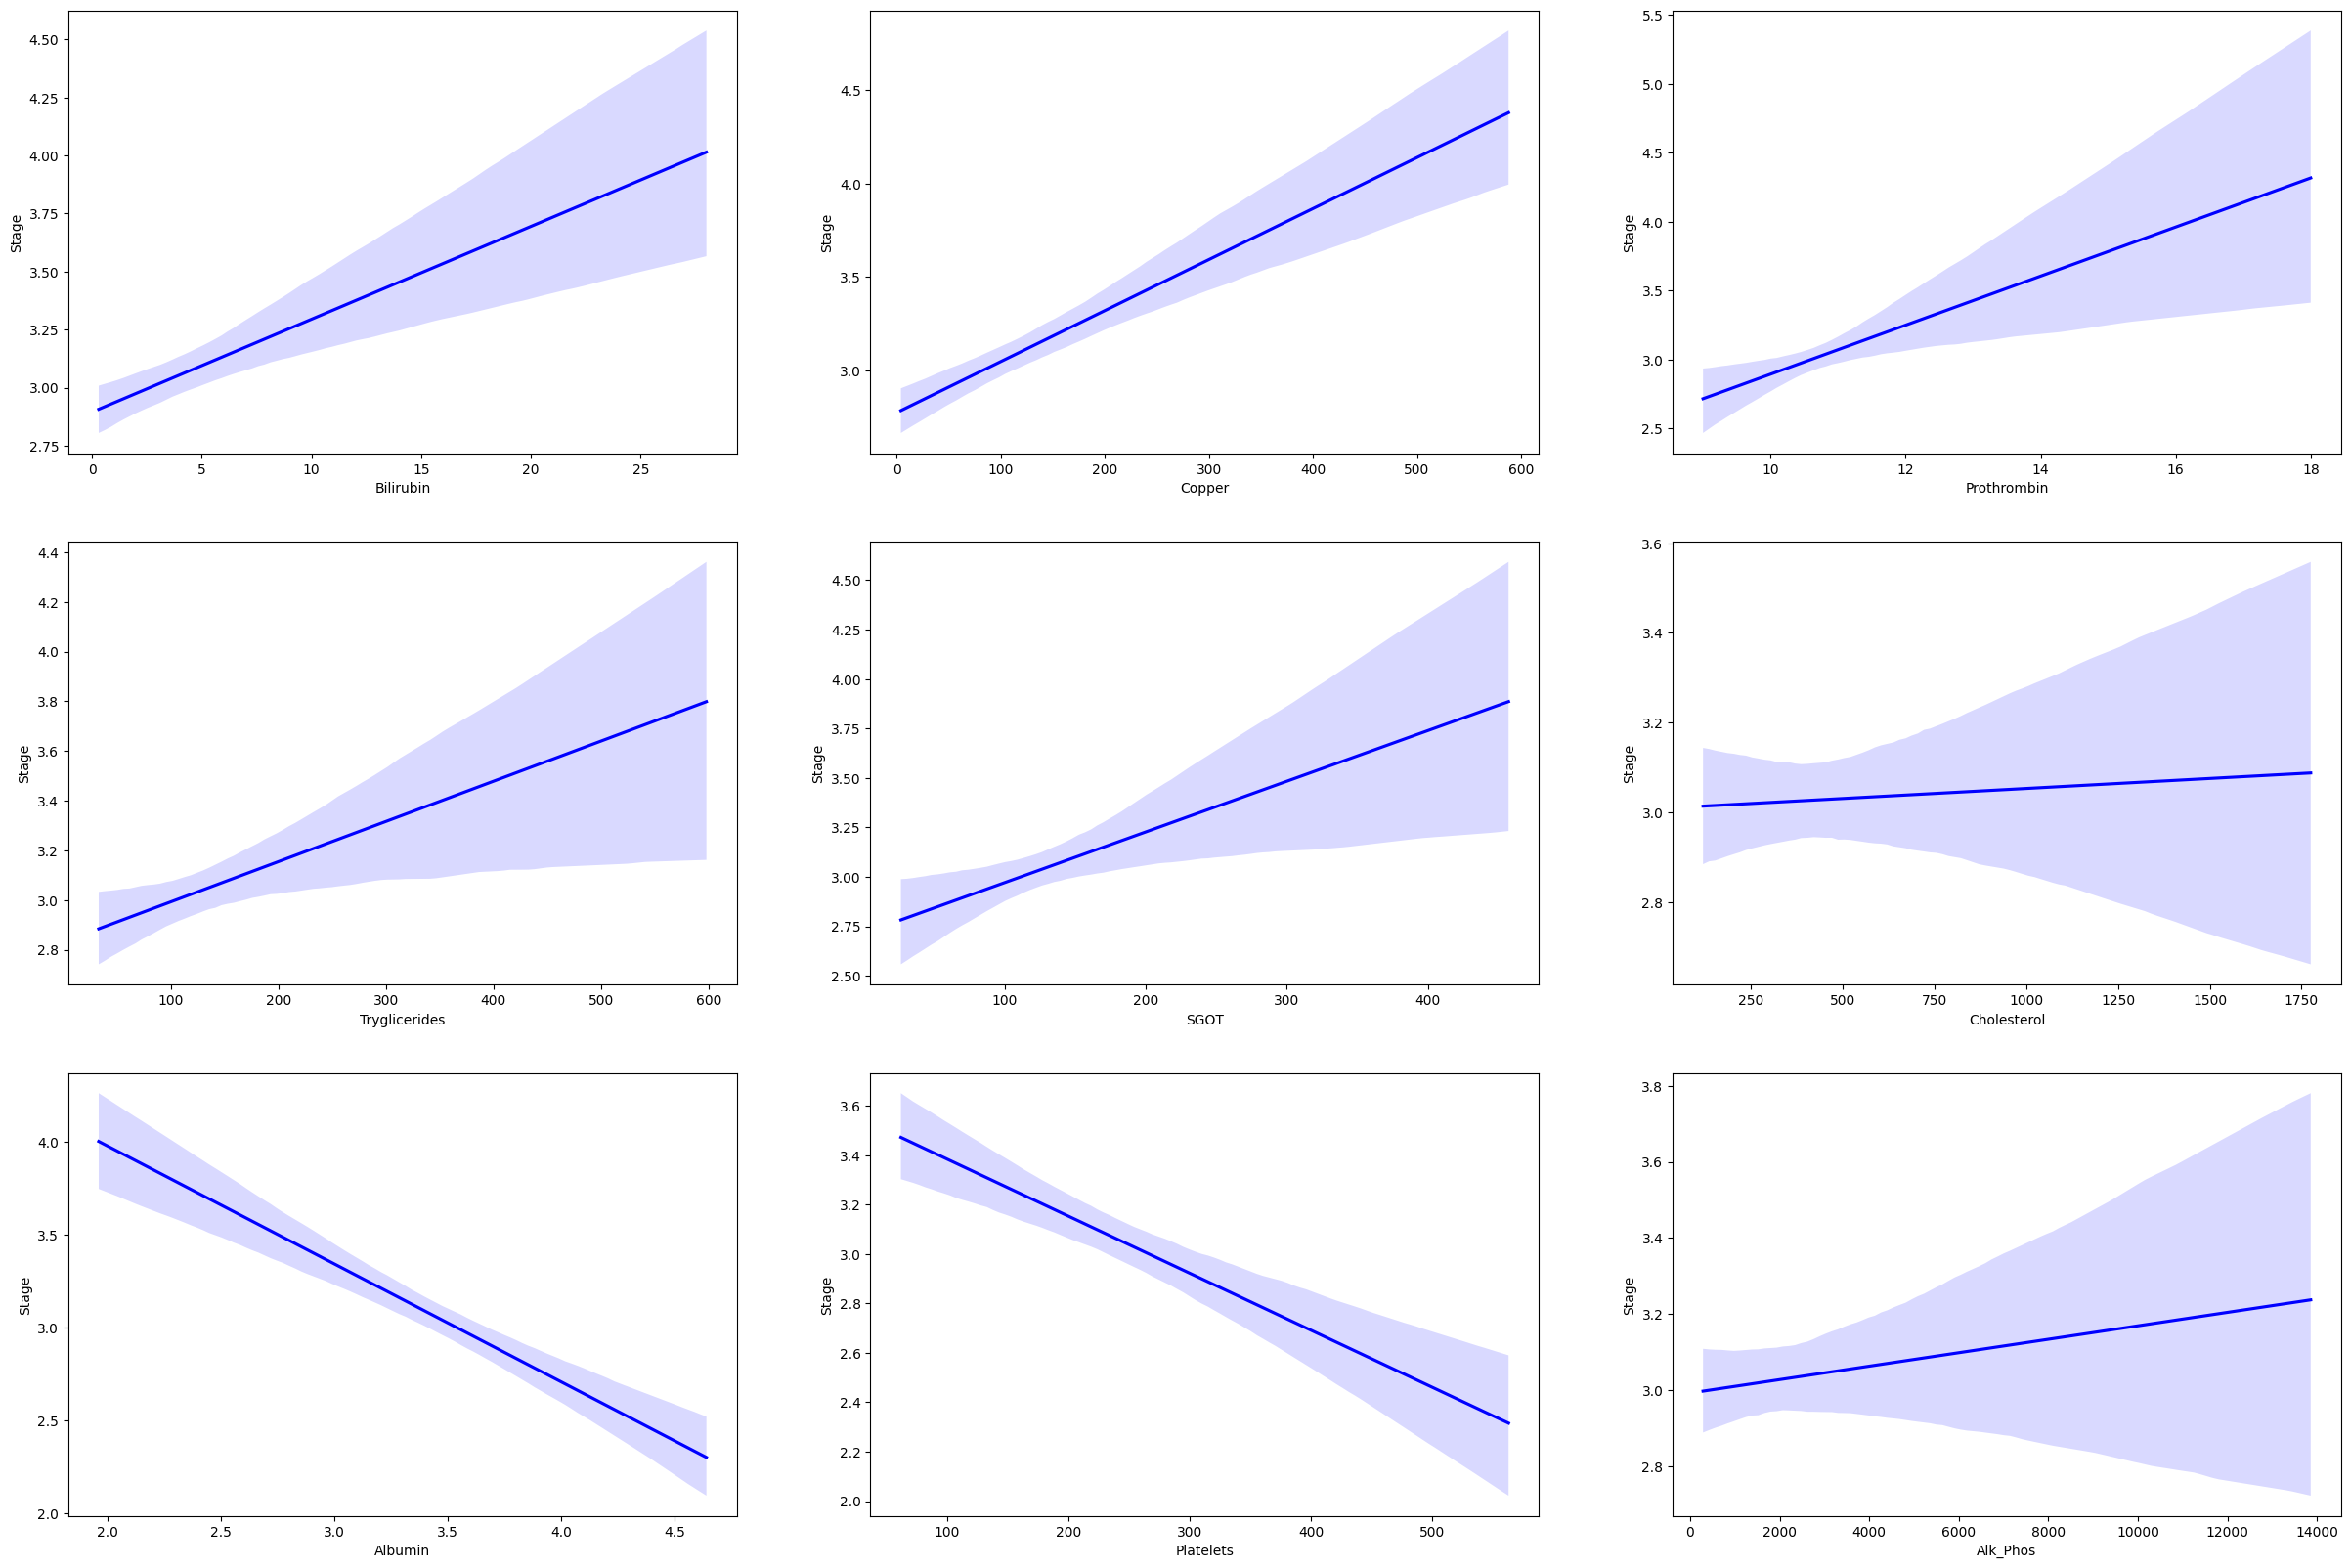

In [ ]:
plt.figure(figsize = (30,20))
num_data = data[["Bilirubin","Copper",'Prothrombin',"Tryglicerides","SGOT","Cholesterol","Albumin","Platelets","Alk_Phos"]]
i = 0
for c in num_data:
    i +=1
    plt.subplot(3,3,i)
    sns.regplot(x = data[c],y = data["Stage"],scatter=False, color='blue',)

The above graphs reveal a clear pattern between parameters and cirrhosis diagnosis.Let's take a look one by one:


*   Amounts of Bilirubin progressively increases with the stages,Hence higher levels of direct bilirubin in the blood indicate your liver isn't clearing bilirubin properly indicating liver damage.

*  High copper levels shows a positive relation with cirrhosis diagonosis indicative of a higher likelihood of being diagnosed with cirrhosis.

*  Data shows that a high Prothrombin usually means that there is serious liver damage or cirrhosis.

* Similarly, High triglicerides might be suggestive of cirrhosis.

* Cholesterol levels don't show any significant increase suggesting that it is not a strong parameter to judge the presence of the disease

* Graph shows a positive link between SGOT(serum glutamic-oxaloacetic transaminase: it is a protein made by liver cells.)  and liver cirrhosis as well.

* However, Albumin and platelets show a negative slope indicating that their amounts significantly falls in case of cirrhosis .

* Alk_Phos(alkaline phosphatase ) also show a slight increase.


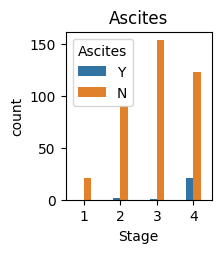

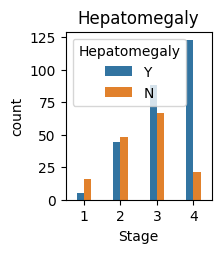

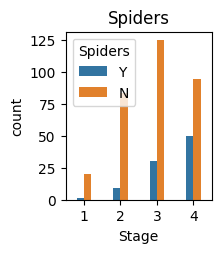

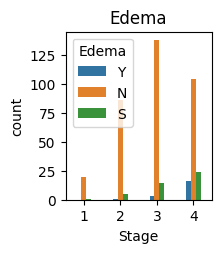

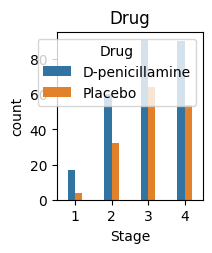

In [ ]:
cat_data=["Ascites",	"Hepatomegaly",	"Spiders",	"Edema","Drug"]
i=0
for c in cat_data:
   i+=1
   plt.subplot(2,3,i)
   sns.countplot(x='Stage', hue=c, data=data, width=0.4)
   plt.title(c)
   plt.show()

* At all stages of cirrhosis, Ascites is not found in patients suggesting that both the conditions are independent of each other.

* **Hepatomegaly** shares a direct correlation with cirrhosis diagnosis.

* Largely,Spider nevus isn't found in cirrhosis diagnosis.

* Edema also isn't found in the first three stages, however there's a visible increase in the number of patients with edema in the last stage, indicating that the condition is specifically associated with the terminal stage of the disease.

* D-penicillamine has been employed more than placebo.

#FINDING RELATIONS IN DATASET

## 3.) Identify any significant predictors of cirrhosis diagnosis. Which clinical features have the strongest association with cirrhosis? Are there any relationships or associations between different clinical features? (For example, does the presence of ascites correlate with hepatomegaly or spiders?)


From the above analysis we can confirm that the condition of Hepatomegaly is directly related to cirrhosis diagnosis.Most of the patients having cirrhosis are found to be suffering from hepatomegaly.
Apart from this, High levels of  Bilirubin, Prothrombin and copper are also indicative of the condition of cirrhosis.

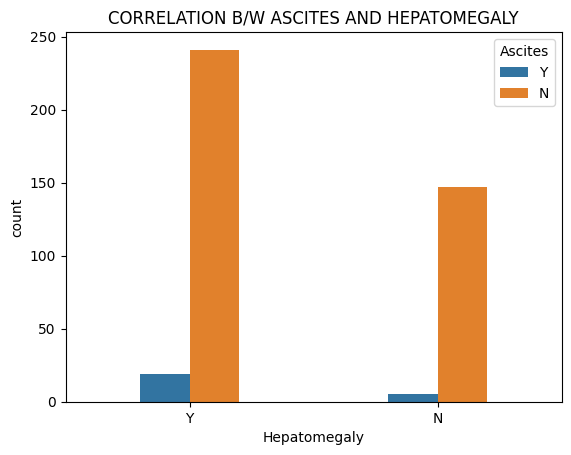

In [ ]:
sns.countplot(x='Hepatomegaly', hue='Ascites', data=data, width=0.4)
plt.title("CORRELATION B/W ASCITES AND HEPATOMEGALY")
plt.show()

 While most individuals with Hepatomegaly (enlarged liver) do not show the presence of Ascites (accumulation of fluid in the abdominal cavity), the prevalence of Ascites is still higher in patients with Hepatomegaly compared to those without Hepatomegaly.
 This indicates that there is still a higher likelihood of developing Ascites among patients with Hepatomegaly compared to those without Hepatomegaly.

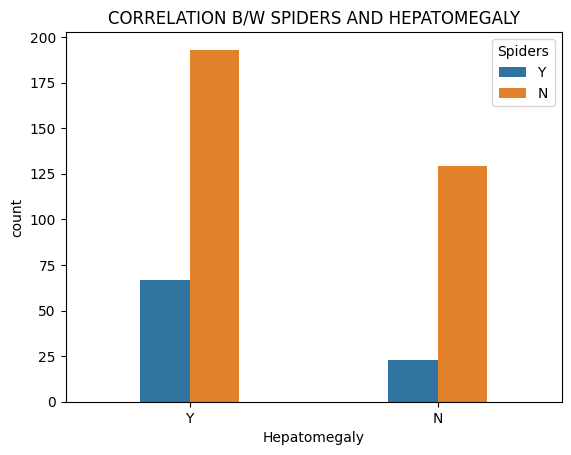

In [ ]:
sns.countplot(x='Hepatomegaly', hue='Spiders', data=data, width=0.4)
plt.title("CORRELATION B/W SPIDERS AND HEPATOMEGALY")
plt.show()

Here, Presence of spiders in more in patients with Hepatomegaly than the ones without it, however, most individuals don't have spiders while having hepatomegaly.Hence, There are slight chances of a patient suffering from spiders as well if they have hepatomegaly but based on the available information, it is difficult to provide a definitive analysis regarding the observed relationship between Hepatomegaly and the presence of spiders.

#4.)Perform feature encoding or transformation on categorical variables (such as gender, drug) in the dataset. Which encoding technique would be most suitable?


For attributes:
* Sex: M (male) or F (female)
* Ascites: presence of ascites N (No) or Y (Yes)
* Drug: type of drug D-penicillamine or placebo
* Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
* Spiders: presence of spiders N (No) or Y (Yes)
* Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
*  Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)

Label encoding is suitable as there's an inherent order or ranking.
e.g. : F:1 and M:0 etc.We encode features to represent categorical or text data in a format that can be effectively used by machine learning algorithms since ML models work on numerical data.




In [ ]:
data['Sex'] = data['Sex'].replace({'M':0, 'F':1})
data['Ascites'] = data['Ascites'].replace({'N':0, 'Y':1})
data['Drug'] = data['Drug'].replace({'D-penicillamine':1, 'Placebo':0})
data['Hepatomegaly'] = data['Hepatomegaly'].replace({'N':0, 'Y':1})
data['Spiders'] = data['Spiders'].replace({'N':0, 'Y':1})
data['Edema'] = data['Edema'].replace({'N':0, 'Y':1, 'S':-1})
data['Status'] = data['Status'].replace({'C':0, 'CL':1, 'D':-1})

In [ ]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,age_group
0,1,400,-1,1,58.805479,1,1,1,1,1,...,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4,46-60
1,2,4500,0,1,56.484932,1,0,1,1,0,...,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3,46-60
2,3,1012,-1,1,70.120548,0,0,0,0,-1,...,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4,61+
3,4,1925,-1,1,54.778082,1,0,1,1,-1,...,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4,46-60
4,5,1504,1,0,38.131507,1,0,1,1,0,...,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3,31-45


# 5.)Identify any unusual or extreme values in the medical measurements. For example, patients with extremely high or low values for a particular measurement. (HINT- Box plot)

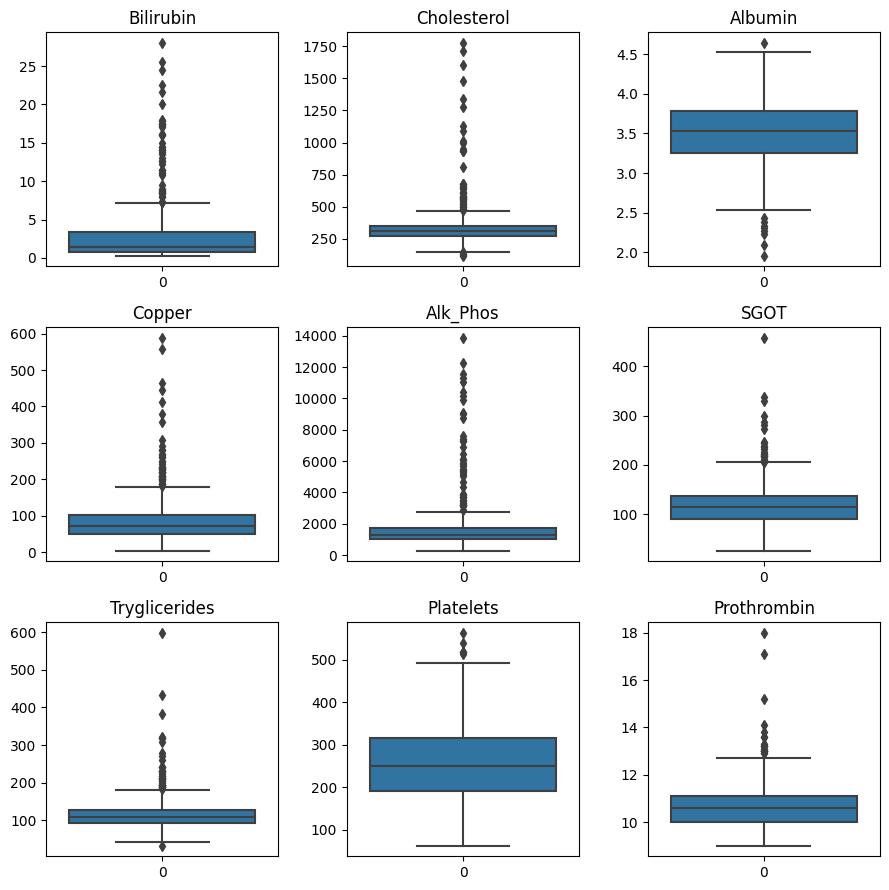

In [ ]:
columns=['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9,9))
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(data=data[column], ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

The above displayed boxplots clearly represent all the outliers present in different attributes.

#PREDICTIVE MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest


In [ ]:
data.drop('age_group', axis=1, inplace=True)


In [ ]:
data['Stage'] = np.where(data['Stage'] == 4, 1, 0)

In [ ]:
x = data.drop([ 'Stage','Drug','Status','ID'], axis = 1)
y = data['Stage']

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1,shuffle=True)

In [ ]:
model= LogisticRegression()
model.fit(train_x,train_y)
model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(train_x,train_y)

0.7355623100303952

In [ ]:
 model.score(test_x,test_y)

0.7590361445783133

In [ ]:
print('The trained model have an accuracy of : ', model.score(test_x,test_y)*100)

The trained model have an accuracy of :  75.90361445783132


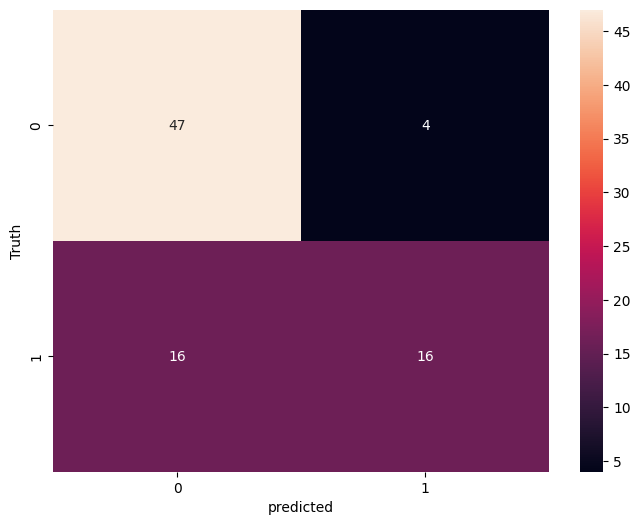

In [ ]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(test_x)
cm = confusion_matrix(test_y,y_predicted)


plt.figure(figsize = (8,6))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")
plt.show()

Hence, Our trained logistic regression model have an accuracy of 75.9036.